<a href="https://colab.research.google.com/github/michellechen202212/ucb/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](https://github.com/michellechen202212/ucb/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Data Problem Definition

The objective is to analyze the data to identify the key factors that influence the price of a used car. By examining features such as mileage, year, condition, and fuel type, we aim to determine which attributes have the greatest impact on pricing. Using predictive modeling and feature importance analysis, we’ll uncover trends and relationships in the data. This will allow us to provide actionable insights to the dealership, helping them align their pricing strategies with what customers value most.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Initial dataset review
load and preview the data, check for missing values, examine data types

# Data profiling
understand distributions, look for outliers, assess feature cardinality

# Data quality checks
dupiicate records, invalid entries (negative mileages, future years), inconsistent formatting, missing or sparse features

# Relationships and dependencies
correlations, explore interactions, check target variable

# Business relevance
align data with business goals, identify missing features

# Document findings
create a summary of data quality issues (missing values, outliers), key insights about distributions and relationships, initial thoughts on which features might be more relevant to the business question.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

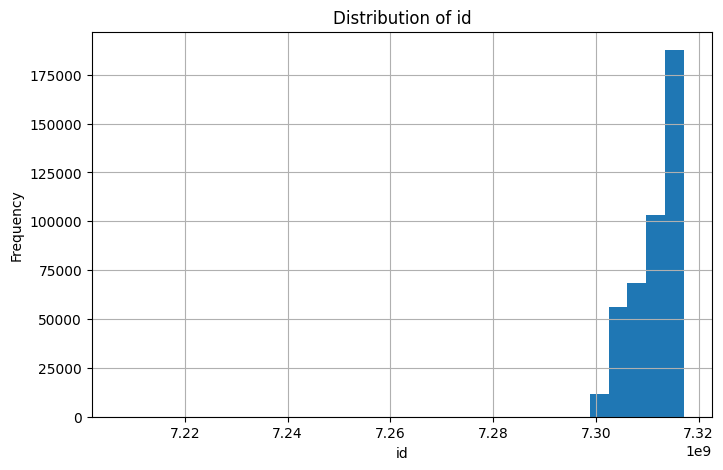

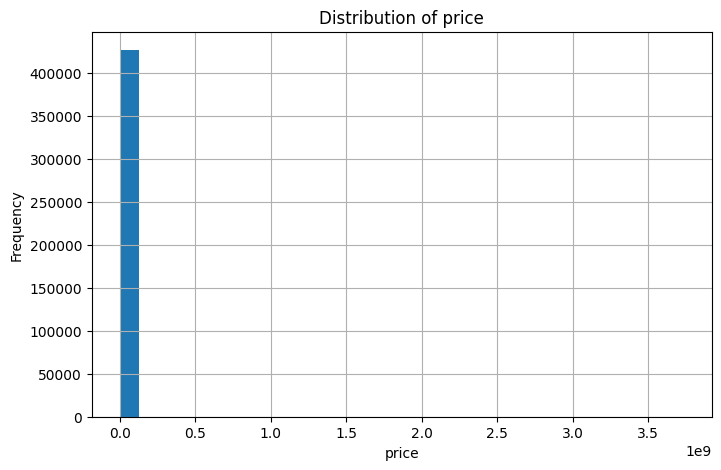

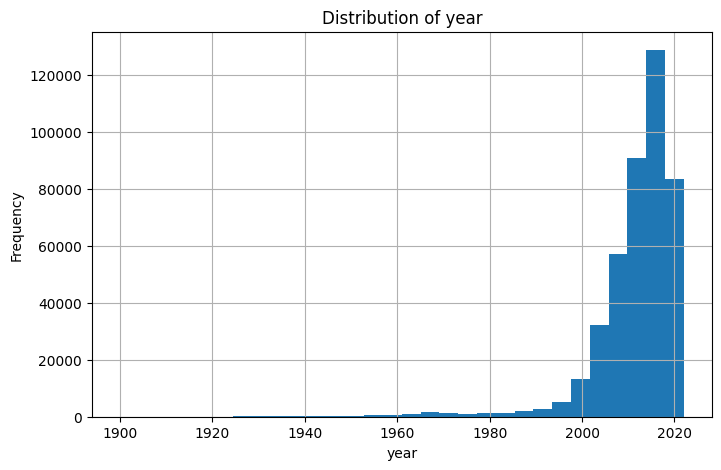

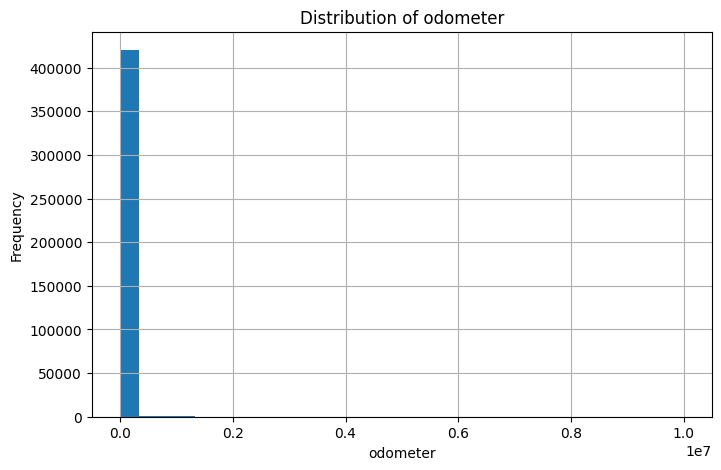

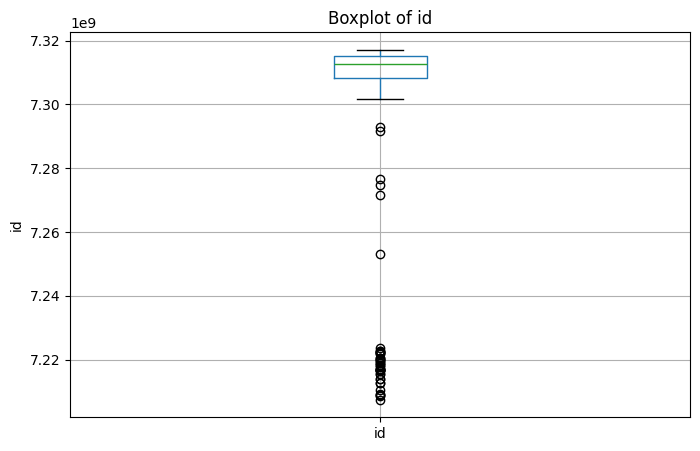

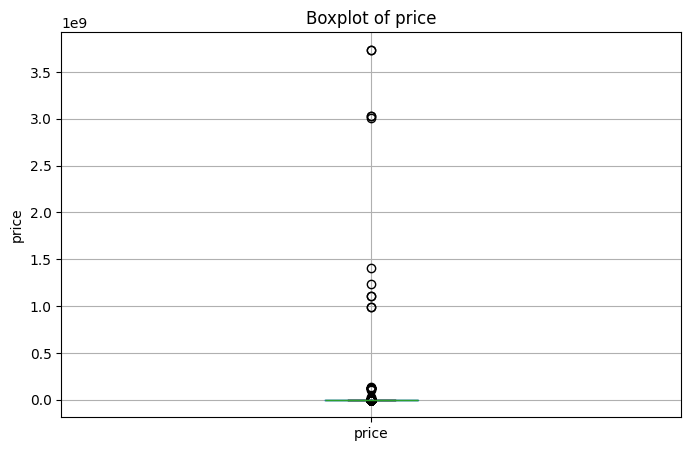

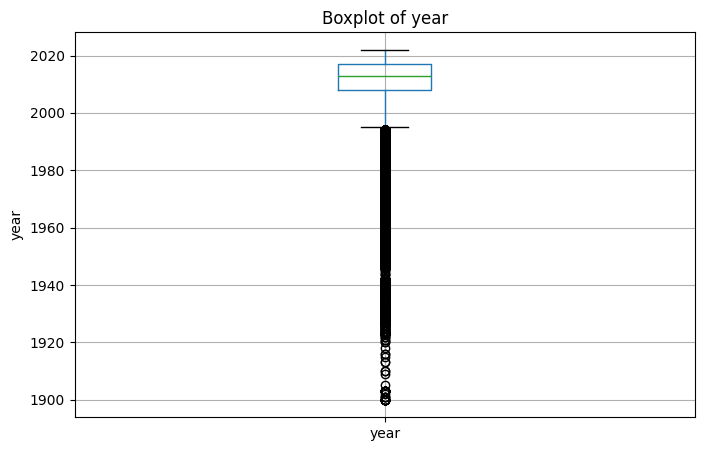

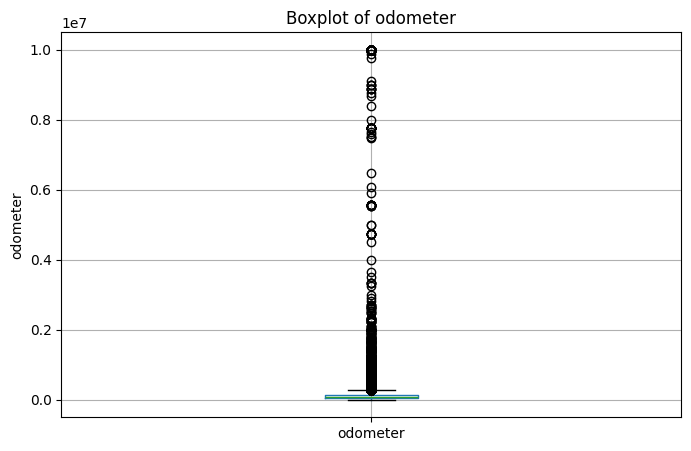

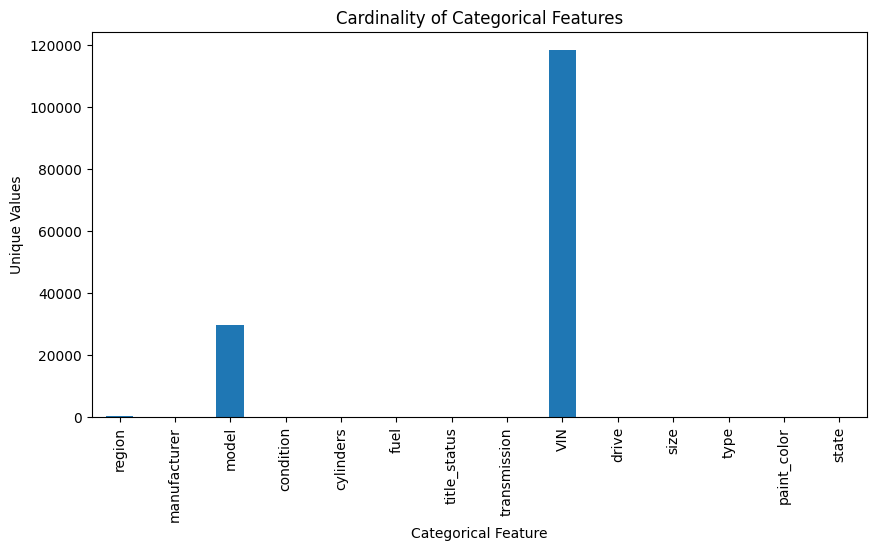

Shape:
(426880, 18)


Columns:
['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


Missing Values:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


Data Types:
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive

In [18]:
# Reimport necessary libraries to address the reset environment
import pandas as pd
import matplotlib.pyplot as plt
import datetime


# Reload the dataset from the user's provided file
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)
vehicles_data.describe(), vehicles_data.info(), vehicles_data.head()

# Analyze distributions of numerical features
numerical_features = vehicles_data.select_dtypes(include=["float64", "int64"]).columns
numerical_stats = vehicles_data[numerical_features].describe()


# Check for outliers using IQR for numerical features
outliers = {}
for column in numerical_features:
    Q1 = vehicles_data[column].quantile(0.25)
    Q3 = vehicles_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = vehicles_data[(vehicles_data[column] < Q1 - 1.5 * IQR) |
                                     (vehicles_data[column] > Q3 + 1.5 * IQR)][column].count()


# Plot distributions of numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    vehicles_data[column].hist(bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots for outlier detection
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    vehicles_data.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

categorical_features = vehicles_data.select_dtypes(include=["object"]).columns

# Plot cardinality of categorical features
categorical_cardinality = vehicles_data[categorical_features].nunique()
categorical_cardinality.plot(kind='bar', figsize=(10, 5))
plt.title('Cardinality of Categorical Features')
plt.xlabel('Categorical Feature')
plt.ylabel('Unique Values')
plt.show()


# Assess feature cardinality for categorical features
categorical_features = vehicles_data.select_dtypes(include=["object"]).columns
categorical_cardinality = vehicles_data[categorical_features].nunique()
negative_mileage = vehicles_data[vehicles_data['odometer'] < 0].shape[0]

# Check for records with future years
import datetime
current_year = datetime.datetime.now().year
future_years = vehicles_data[vehicles_data['year'] > current_year].shape[0]

# Display results
results = {
    "Shape": vehicles_data.shape,
    "Columns": vehicles_data.columns.tolist(),
    "Missing Values": vehicles_data.isnull().sum(),
    "Data Types": vehicles_data.dtypes,
    "Numerical Stats": numerical_stats,
    "Outliers Count": outliers,
    "Categorical Cardinality": categorical_cardinality,
    "Negative Mileage Records": negative_mileage,
    "Future Year Records": future_years
}
for key, value in results.items():
    print(f"{key}:")
    print(value)
    print("\n")


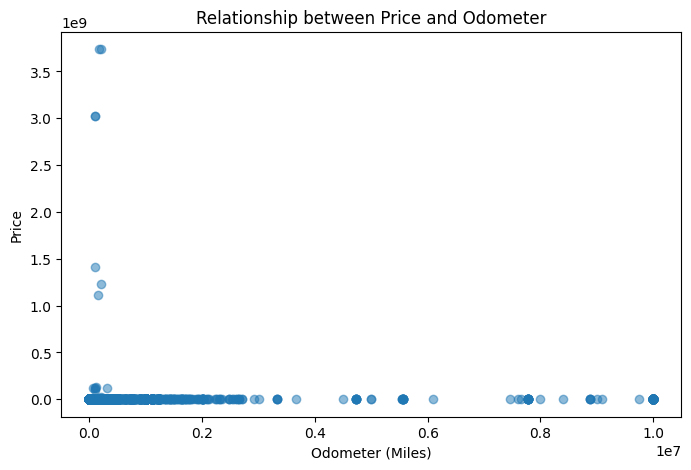

<Figure size 1000x600 with 0 Axes>

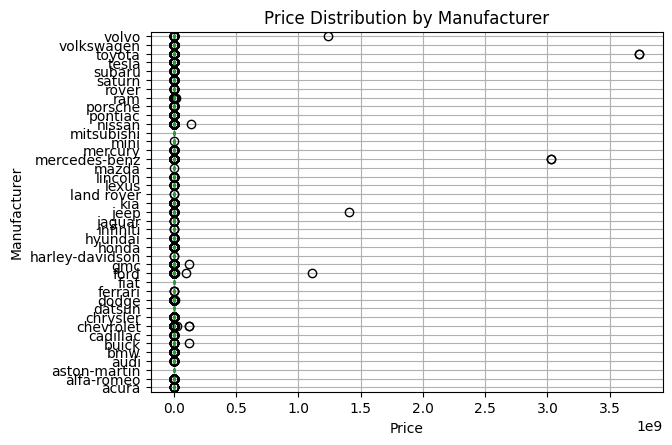

<Figure size 1000x600 with 0 Axes>

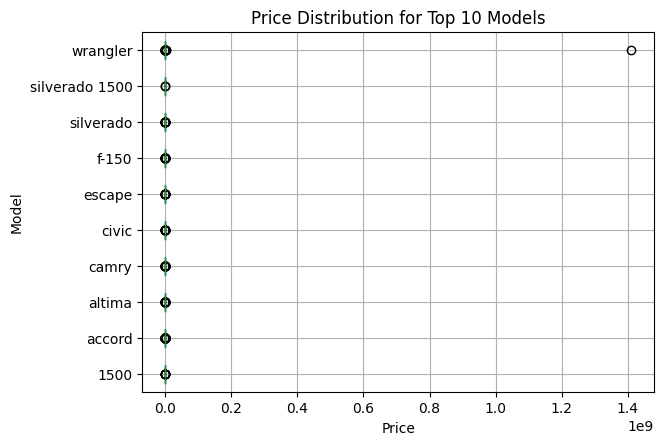

In [19]:
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Filter out rows with missing values in relevant columns
relevant_columns = ['price', 'model', 'odometer', 'manufacturer']
filtered_data = vehicles_data[relevant_columns].dropna()

# Plot relationships

# Price vs. Odometer
plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['odometer'], filtered_data['price'], alpha=0.5)
plt.title('Relationship between Price and Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()

# Price vs. Manufacturer (Boxplot)
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='price', by='manufacturer', vert=False)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.suptitle('')  # Remove default title
plt.show()

# Price vs. Model (Boxplot)
top_models = filtered_data['model'].value_counts().head(10).index
top_models_data = filtered_data[filtered_data['model'].isin(top_models)]

plt.figure(figsize=(10, 6))
top_models_data.boxplot(column='price', by='model', vert=False)
plt.title('Price Distribution for Top 10 Models')
plt.xlabel('Price')
plt.ylabel('Model')
plt.suptitle('')  # Remove default title
plt.show()

Here are the visualizations showcasing relationships between price, model, odometer, and manufacturer:

**Price vs. Odometer (Scatter Plot)**:
Insights:
This scatter plot shows how vehicle price correlates with mileage (odometer readings).

Typically, lower mileage vehicles tend to have higher prices. Clusters or deviations can indicate specific market trends or anomalies.

**Price Distribution by Manufacturer** (Boxplot):

Insights:
This boxplot displays how prices vary across different manufacturers.
Some manufacturers have consistently higher median prices, suggesting luxury or premium brands, while others have broader ranges or lower medians.

**Price Distribution for Top 10 Models** (Boxplot):

Insights:
Focusing on the top 10 most frequent models, this boxplot highlights price variability within specific models.

Differences in price ranges between models can provide insights into their perceived value, market demand, or condition variations.

**Distribution of id: **
Explanation: The id column typically represents unique identifiers for records. A histogram of id should ideally show a uniform distribution since each id is unique

Insight: This visual doesn’t provide meaningful analytical insights unless there are patterns or duplicates, which could indicate data quality issues.

**Distribution of price:**
Explanation: The histogram of price shows the frequency of vehicles within different price ranges.

Insights:
If most values are clustered at the lower end, the dataset may include predominantly budget or used vehicles.

Outliers (e.g., very high prices) may represent luxury or rare vehicles.

Skewness in the distribution can guide log transformations for normalization if used in predictive modeling.

**Distribution of odometer:**
Explanation: The histogram of odometer (vehicle mileage) shows the distribution of recorded mileage for vehicles.

Insights:
Peaks in specific mileage ranges (e.g., around 100,000 miles) may reflect common vehicle usage or market preferences.

Low mileage entries could indicate new or lightly used vehicles, while high-mileage entries may represent older or heavily used ones.

Outliers, like negative mileage, signal data errors that need correction.




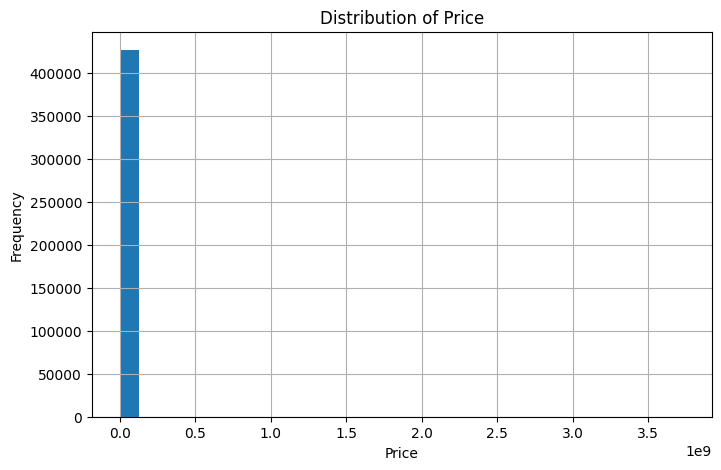

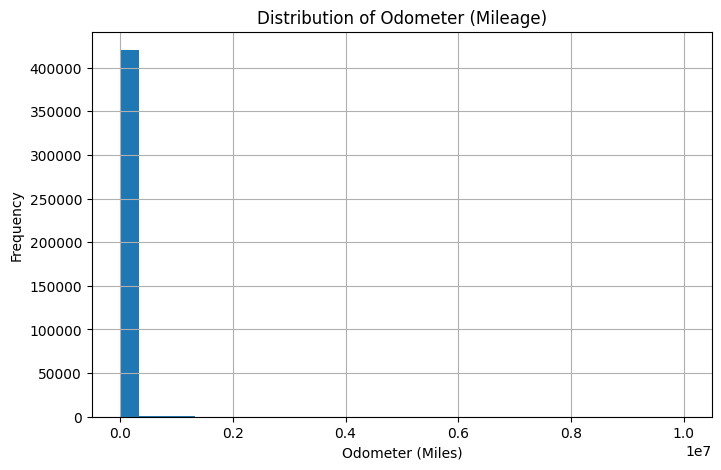

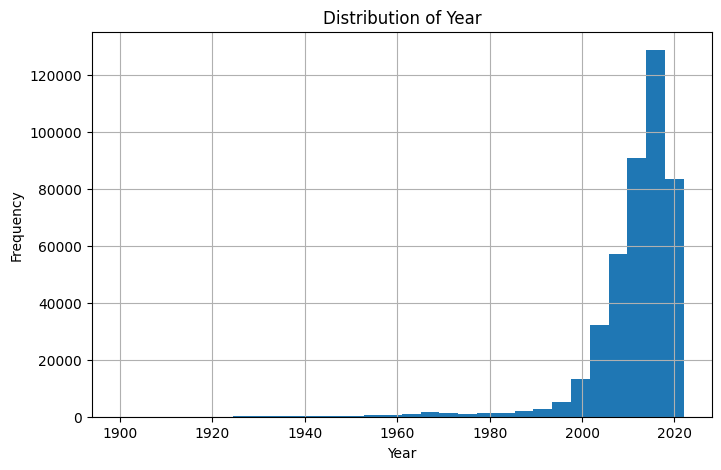

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset from the new file
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Plot distribution of 'price', 'odometer', and 'year'

# Price Distribution
plt.figure(figsize=(8, 5))
vehicles_data['price'].hist(bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Odometer Distribution
plt.figure(figsize=(8, 5))
vehicles_data['odometer'].hist(bins=30)
plt.title('Distribution of Odometer (Mileage)')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Frequency')
plt.show()

# Year Distribution
plt.figure(figsize=(8, 5))
vehicles_data['year'].hist(bins=30)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

The distribution of price, odometer, and year reveals insights into popular price rnages, typical vehicle ages, and mileage


Histograms for numerical features to showcase their distributions.

Boxplots for numerical features to help identify potential outliers.

A bar chart depicting the cardinality (number of unique values) of each categorical feature.



Histograms of Numerical Features:

Purpose: Show the distribution of values for each numerical feature.
Insight:
Identify whether data follows a normal, skewed, or uniform distribution.
Example: A histogram for mileage (odometer readings) may reveal clustering around specific mileage ranges or skewness if vehicles tend to be newer or older.
Boxplots of Numerical Features:

Purpose: Visualize the range, quartiles, and outliers for numerical features.
Insight:
Highlight potential outliers, as they appear as points outside the whiskers.
Example: A boxplot for price may show a concentration of vehicles in the lower price range, with significant outliers at higher price points, indicating luxury or rare vehicles.
Bar Chart of Categorical Cardinality:

Purpose: Display the number of unique categories in each categorical feature.
Insight:
High cardinality (many unique values) suggests features like vehicle models or brands, which may require careful handling (e.g., grouping or encoding).
Low cardinality indicates simpler features, such as vehicle conditions (e.g., "new," "used"), which are easier to analyze.
Overall Insights:
Numerical Features: Histograms reveal trends and patterns, while boxplots help detect outliers. For example, odometer readings and prices may show non-uniform distributions with outliers at the extremes.
Categorical Features: The bar chart provides clarity on the variability and richness of categorical data, critical for feature engineering or aggregating insights by key groups.
These visuals are foundational for understanding your dataset and preparing it for further analysis or modeling.

# 1. Profile Summary
**Shape**: The dataset contains 426,880 rows and 18 columns.

**Columns**: Lists all the features in the dataset, such as price, year, manufacturer, condition, and odometer.

**Missing Value**s:
Shows the number of missing entries for each column. For example:
year has 1,205 missing values.

condition has 174,104 missing values (a significant percentage).

**Some columns**, like id, region, and price, have no missing values.

**Data Types:**
Indicates the data type of each column:
int64 and float64 for numerical columns (e.g., price, year, odometer).
object for categorical columns (e.g., region, manufacturer, fuel).


# 2. Numerical Stats
Statistical summary of numerical columns:

**id**: A unique identifier, likely not relevant for analysis.

**price**:
Wide range from $0 to $3.7 billion, indicating extreme outliers.

Median price $13,950 is much lower than the mean  ($75,199), showing right skewness.

**year:**
Ranges from 1900 to 2022; older years may include outliers or unusual entries.

**odometer:**
Average mileage is ~98,043, but values up to 10 million suggest potential errors.


# 3. Outliers Count
Identifies the number of extreme values (potentially problematic) for key numerical columns:

**price:** 8,177 rows contain outliers based on the Interquartile Range (IQR) method.

**year:** 15,896 rows have outliers, likely older or invalid years.

**odometer:** 4,385 rows have unusually high or low mileage values.

# 4. Categorical Cardinality
Shows the number of unique categories in each categorical column:

## High Cardinality:
**model** (29,649 unique values): Many unique car models, which might require grouping or simplification.

**VIN** (118,246 unique values): Likely not useful for analysis due to its specificity.

**region** (404 unique values): Indicates a large geographic coverage.

## Low Cardinality:

Features like condition (6 categories), cylinders (8 categories), and fuel (5 categories) are manageable for analysis.


# What This Means
## Key Challenges:

Missing data in columns like condition and cylinders may require imputation or removal.

Extreme outliers in price, year, and odometer could distort modeling and should be addressed.

High cardinality features like model might complicate categorical encoding and require grouping.

## Opportunities:

**Numerical features** (price, year, odometer) can provide strong predictive power once cleaned.

**Manageable categorical features** (e.g., condition, fuel) can be used to capture important trends.


# Next Steps:

Handle missing data and outliers.

Simplify high-cardinality categorical features.

Align the dataset with the business goal of identifying price drivers for used cars.



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [21]:
# Calculate missing values for each column
missing_values = vehicles_data.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Action: Set a threshold for excessive missing data (e.g., drop columns with more than 25% missing values)
threshold = 0.50
columns_to_drop = missing_values[missing_values > len(vehicles_data) * threshold].index

# Display the columns that will be dropped due to excessive missing values
print(f"\nColumns dropped due to more than {threshold * 100}% missing values:")
print(list(columns_to_drop))

# Add specific columns to drop explicitly
additional_columns_to_drop = ['id', 'VIN', 'size', 'type','region','state', 'title_status']
columns_to_drop = columns_to_drop.union(additional_columns_to_drop)

# Display the final list of columns to drop
print(f"\nColumns dropped due to more than {threshold * 100}% missing values or explicit removal:")
print(list(columns_to_drop))

# vehicles_data['odometer'].fillna(vehicles_data['odometer'].median(), inplace=True)
# vehicles_data['manufacturer'].fillna('Unknown', inplace=True)

# # handle high cardinality features
# top_models = vehicles_data['model'].value_counts().head(20).index
# vehicles_data['model'] = vehicles_data['model'].apply(lambda x: x if x in top_models else 'Other')

# feature engineering
# vehicles_data['age'] = datetime.datetime.now().year - vehicles_data['year']
# vehicles_data['price_per_mile'] = vehicles_data['price'] / vehicles_data['odometer']

# # normalize/scale numerical features
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# vehicles_data[['price', 'odometer', 'age']] = scaler.fit_transform(vehicles_data[['price', 'odometer', 'age']])



# Drop columns with excessive missing values or explicitly specified columns
vehicles_data_cleaned = vehicles_data.drop(columns=columns_to_drop, errors='ignore')


# Confirm columns are dropped
print(f"\nRemaining Columns After Dropping:")
print(vehicles_data_cleaned.columns)

# Remove rows where 'year' is earlier than 1990
if 'year' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year'] >= 1990]
    print(f"\nRemoved rows with 'year' earlier than 2000. Remaining rows: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'year' not found in the dataset. Skipping filtering by year.")

# Remove rows where 'price' <= 1000 or 'price' >= 100000
if 'price' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned = vehicles_data_cleaned[(vehicles_data_cleaned['price'] > 1000) & (vehicles_data_cleaned['price'] < 100000)]
    print(f"\nRemoved rows with 'price' <= 1000 or 'price' >= 100000. Remaining rows: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'price' not found in the dataset. Skipping filtering by price.")


# For remaining missing values, decide to drop or impute (example: impute numerical columns with median)
numerical_columns = vehicles_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_columns = vehicles_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].mode()[0], inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Handling:")
print(vehicles_data_cleaned.isnull().sum())

# Save the cleaned dataset to a CSV file
cleaned_file_path = 'sample_data/vehicles_cleaned_step1.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")



Missing Values in Each Column:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

Columns dropped due to more than 50.0% missing values:
['size']

Columns dropped due to more than 50.0% missing values or explicit removal:
['VIN', 'id', 'region', 'size', 'state', 'title_status', 'type']

Remaining Columns After Dropping:
Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'paint_color'],
      dtype='object')

Removed rows with 'year' earlier than 2000. Remaining rows: 413292

Removed rows with 'price' <= 1000 or 'price' >= 100000. Remaining rows: 365918


<ipython-input-21-64aaf66e07d3>:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].median(), inplace=True)
<ipython-input-21-64aaf66e07d3>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].


Missing Values After Handling:
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
paint_color     0
dtype: int64

Cleaned dataset saved to sample_data/vehicles_cleaned_step1.csv.


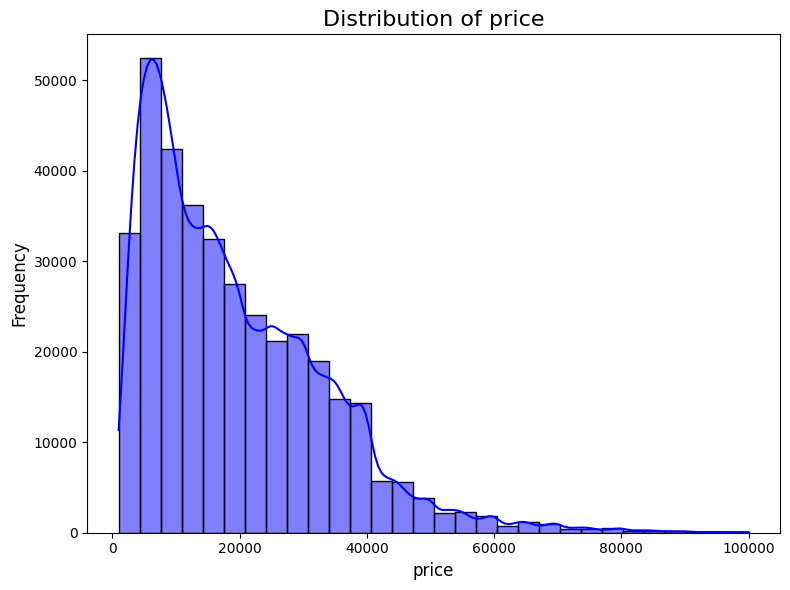

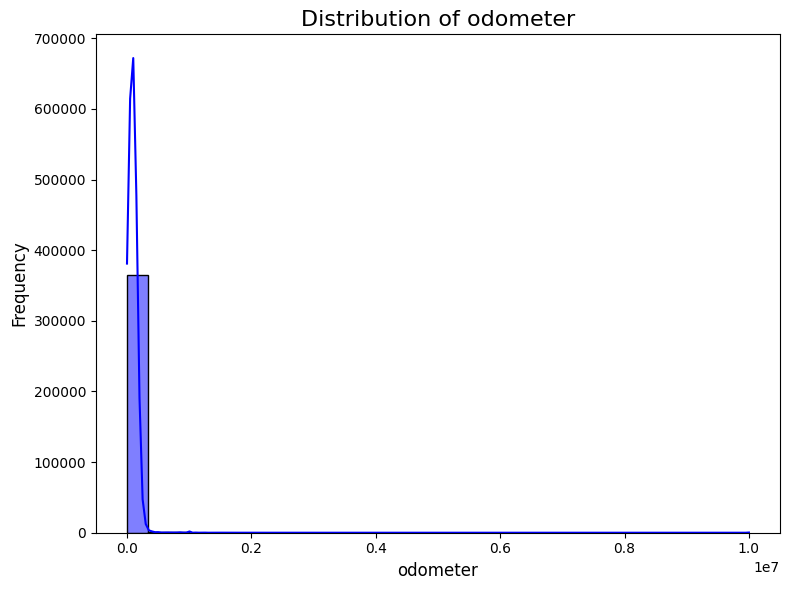

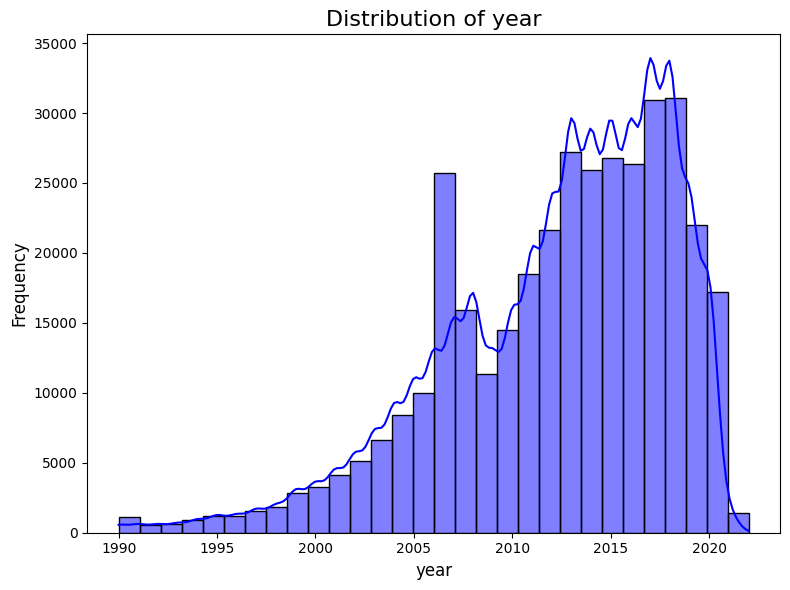

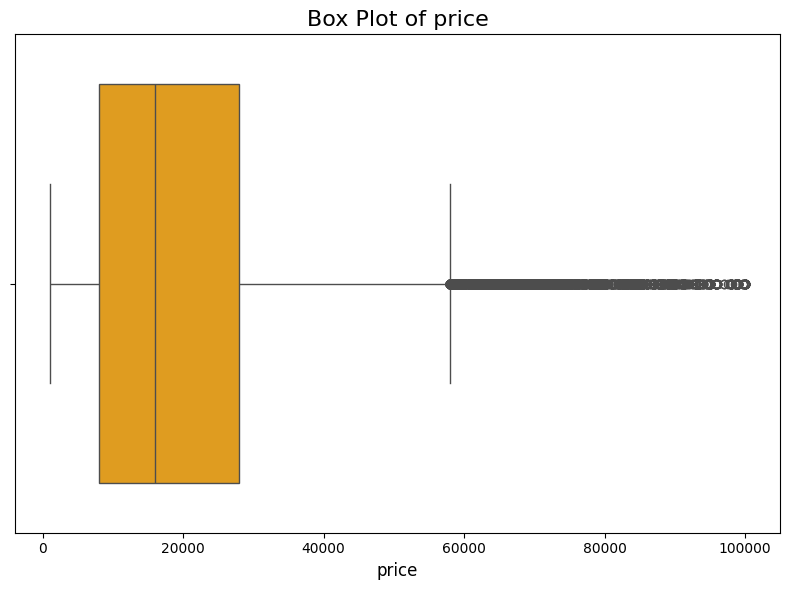

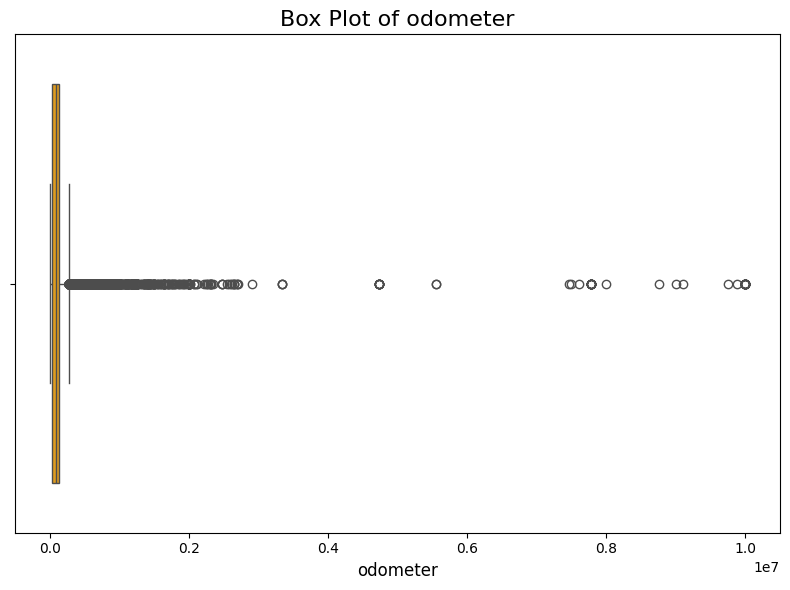

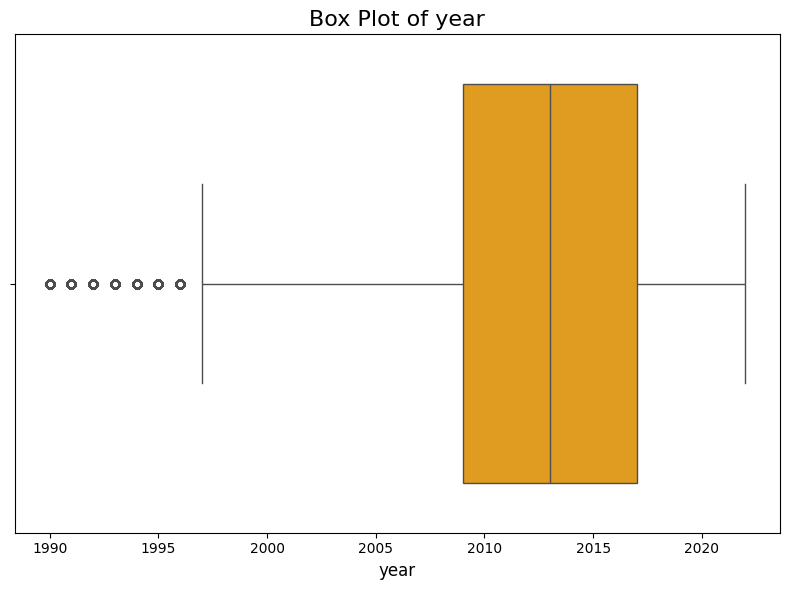

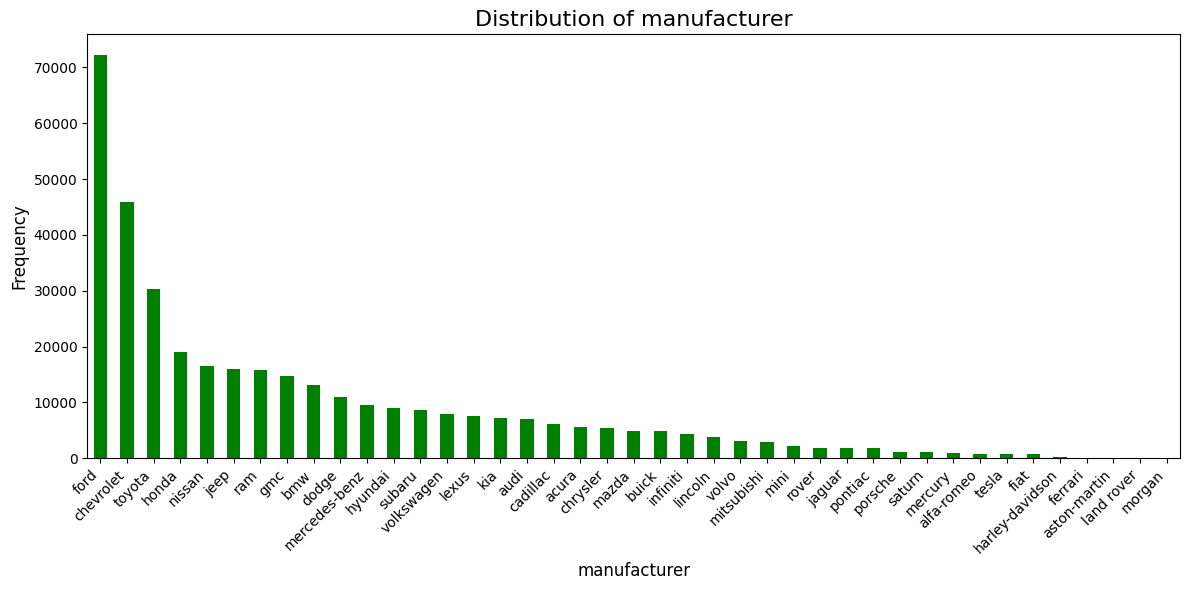

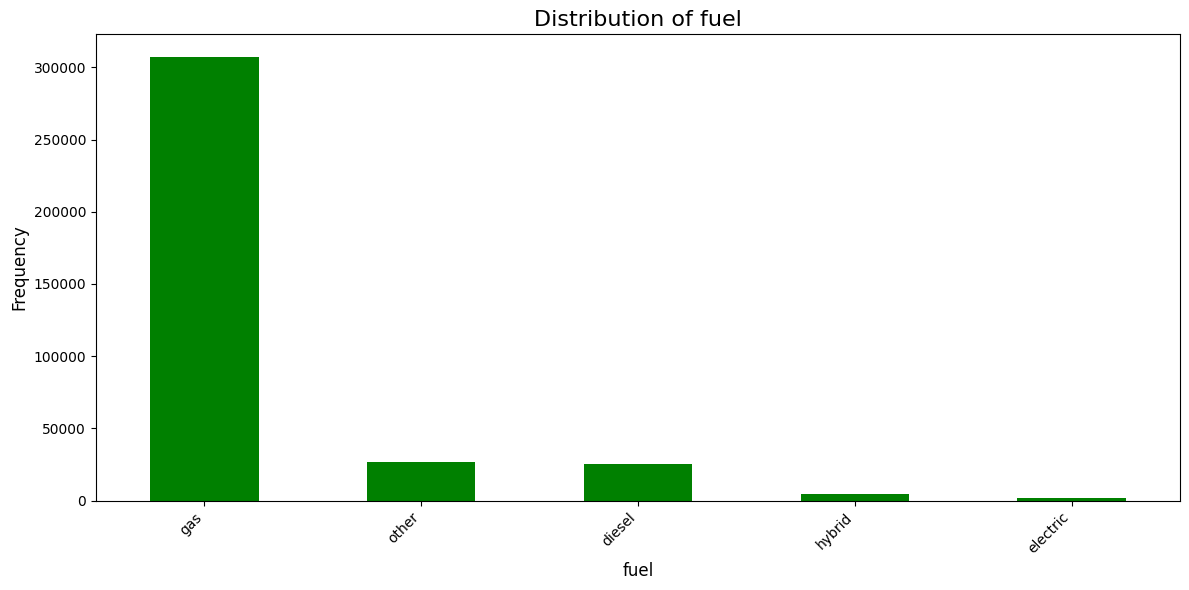

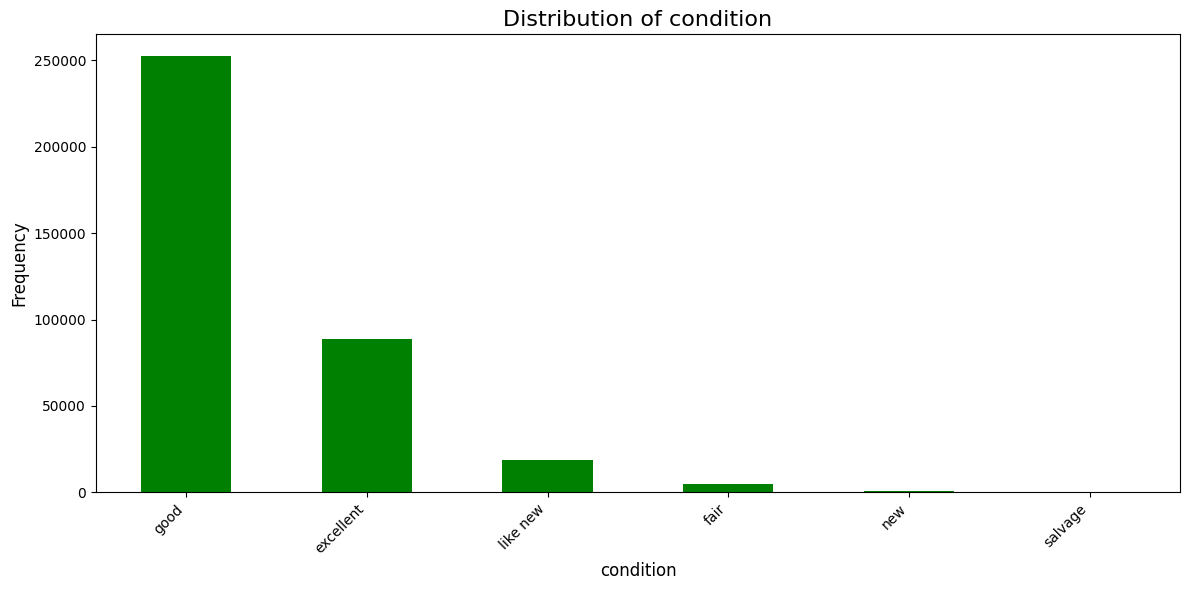

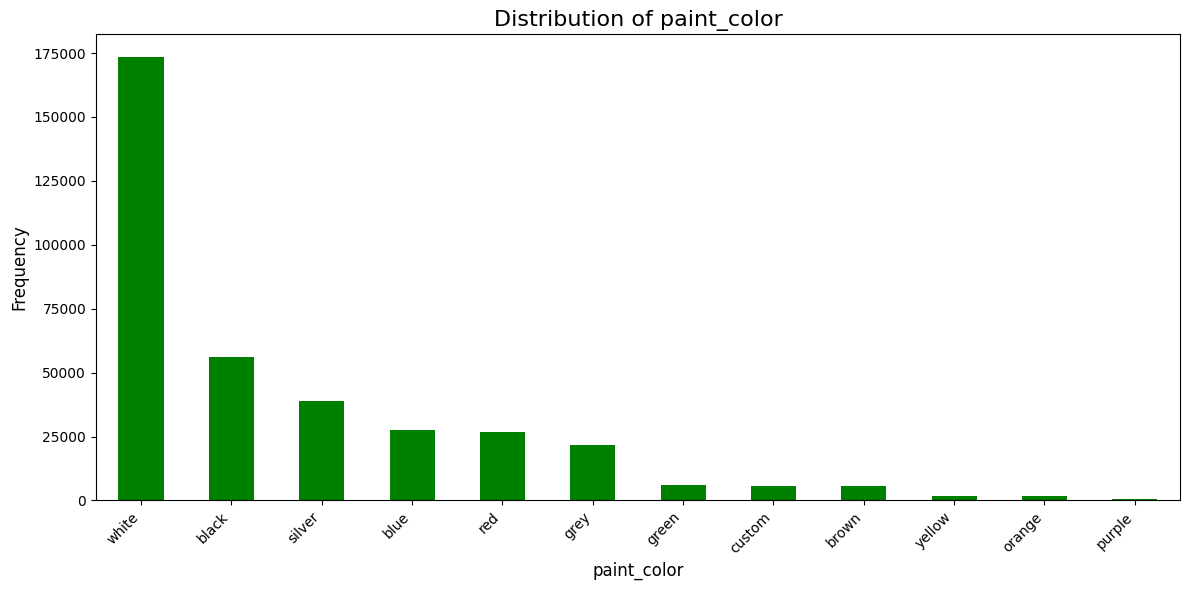

Dataset size before removing outliers: (365918, 11)
Dataset size after removing outliers: (350952, 11)
Dataset saved to sample_data/vehicles_cleaned_step2.csv after handling outliers.

Missing values in categorical columns:


KeyError: "['type'] not in index"

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (replace 'vehicles_cleaned.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_step1.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Explore Feature Distributions: Visualize numerical variables
numerical_columns = ['price', 'odometer', 'year']
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Histograms for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(vehicles_data_cleaned[col], bins=30, kde=True, color='blue')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.show()

# Box plots for numerical variables to identify outliers
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=vehicles_data_cleaned[col], color='orange')
        plt.title(f'Box Plot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

# Bar charts for categorical variables
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        # Check if the column has non-missing values
        if vehicles_data_cleaned[col].notna().any():
            plt.figure(figsize=(12, 6))
            vehicles_data_cleaned[col].value_counts().plot(kind='bar', color='green')
            plt.title(f'Distribution of {col}', fontsize=16)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' has no valid data to plot.")

# Action: Handle outliers using IQR for numerical columns
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print dataset size before removing outliers
print(f"Dataset size before removing outliers: {vehicles_data_cleaned.shape}")

# Remove outliers for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        vehicles_data_cleaned = handle_outliers_iqr(vehicles_data_cleaned, col)

# Print dataset size after removing outliers
print(f"Dataset size after removing outliers: {vehicles_data_cleaned.shape}")

# Save the dataset after handling outliers (optional)
cleaned_file_path_after_outliers = 'sample_data/vehicles_cleaned_step2.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path_after_outliers, index=False)
print(f"Dataset saved to {cleaned_file_path_after_outliers} after handling outliers.")

# Check for missing data in categorical columns (for debugging purposes)
print("\nMissing values in categorical columns:")
print(vehicles_data_cleaned[categorical_columns].isna().sum())


**Distribution of Price**- The chart shows a right-skewed distribution of vehicle prices, with most vehicles priced below 20,000 and a sharp decline in frequency as prices increase. A small number of high-priced vehicles (above 60,000) create a long tail, indicating potential outliers. The smooth density curve highlights this skewness. Most vehicles are affordable, while luxury or specialty vehicles form a minority. Addressing this skewness and analyzing outliers may improve modeling and insights.

**Distribution of Odometer** The chart shows a right-skewed distribution of odometer readings, with most vehicles having low mileage (below 200,000 miles). A long tail indicates the presence of outliers with extremely high mileage. These outliers may need investigation, and a log transformation could help address the skewness for better modeling. Most vehicles in the dataset are moderately used.

**Distribution of manufacturing year** The chart shows the distribution of vehicle manufacturing years, with most vehicles concentrated around 2015-2018, indicating a majority of newer vehicles in the dataset. There is a steady increase in vehicle representation from 1990 to 2010, a peak around 2015-2018, and a sharp decline after 2020, possibly due to incomplete data or reduced production. Older vehicles (pre-2000) are sparsely represented. Further analysis may be needed to address the post-2020 decline and segment vehicles by age.

**Box plot of price** The box plot shows that most vehicle prices are below $20,000, with a significant number of outliers above $60,000, likely representing luxury vehicles. The data is right-skewed, indicating a concentration of low-priced vehicles and a few high-end outliers. Addressing these outliers or applying transformations may improve analysis.

**Box plot of odometer** The box plot shows that most vehicles have low odometer readings, with the data concentrated near zero. A large number of outliers with extremely high mileage, extending beyond 10 million miles, are present. These outliers likely indicate data errors or rare cases and may require removal or adjustment to improve analysis. The data is highly skewed, suggesting the need for preprocessing steps like outlier handling or log transformation.

**Distribution of vehicle by manufacturer** The chart shows that Ford, Chevrolet, and Toyota dominate the dataset, with Ford having the highest frequency. Brands like Honda and Nissan are moderately represented, while luxury and niche manufacturers like Tesla, Porsche, and Ferrari have minimal presence. The dataset focuses mainly on mainstream brands, with limited representation of high-end vehicles.

**Distribution of vehicle by fuel type** The chart shows that gasoline-powered vehicles dominate the dataset, with significantly higher frequencies compared to other fuel types. Diesel and other fuels have moderate representation, while hybrid and electric vehicles are minimally represented, reflecting their niche presence. The dataset is heavily skewed toward traditional fuel types.

**Distribution of vehicle condition** The chart shows that most vehicles are in "good" condition, followed by "excellent" condition, while categories like "like new," "fair," "new," and "salvage" are less common. The dataset is heavily skewed toward well-maintained vehicles, with rare conditions representing niche cases.

**Distribution of paint color**  The chart shows that white is the most common vehicle color, followed by black, silver, and blue. Colors like red and grey are moderately represented, while vibrant or unique colors like yellow, orange, and purple are rare. The dataset is dominated by neutral and classic colors.



In [23]:
# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_step2.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Document Missing Values
missing_values = vehicles_data_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Document Inconsistent Data Entries
# Example: Checking categorical variables for unique values to identify inconsistencies
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
print("\nInconsistent Data Entries in Categorical Variables:")
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        print(f"\n{col}:")
        print(vehicles_data_cleaned[col].unique())

# Document Outliers
# Numerical variables to check for outliers
numerical_columns = ['price', 'odometer', 'year']


def remove_outliers_iqr(df, column, lower_bound_override=None):
    """
    Removes outliers from a DataFrame column using the IQR method.
    Optionally, override the calculated lower bound.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Override lower bound if specified
    if lower_bound_override is not None:
        lower_bound = lower_bound_override

    # Filter rows within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df, lower_bound, upper_bound


# Handle outliers in 'price'
if 'price' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned, price_lower, price_upper = remove_outliers_iqr(
        vehicles_data_cleaned, 'price', lower_bound_override=0
    )
    print(f"\nHandled outliers in 'price':")
    print(f"Lower bound: {price_lower}, Upper bound: {price_upper}")
    print(f"Remaining rows after removing 'price' outliers: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'price' not found in the dataset. Skipping outlier handling for 'price'.")

# Handle outliers in 'odometer'
if 'odometer' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned, odometer_lower, odometer_upper = remove_outliers_iqr(
        vehicles_data_cleaned, 'odometer', lower_bound_override=0
    )
    print(f"\nHandled outliers in 'odometer':")
    print(f"Lower bound: {odometer_lower}, Upper bound: {odometer_upper}")
    print(f"Remaining rows after removing 'odometer' outliers: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'odometer' not found in the dataset. Skipping outlier handling for 'odometer'.")


# Drop rows with missing values
vehicles_data_cleaned.dropna().drop_duplicates()
cleaned_file_path = 'sample_data/vehicles_cleaned_step3.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")
print(vehicles_data_cleaned[numerical_columns].describe())



Missing Values in Each Column:
Series([], dtype: int64)

Inconsistent Data Entries in Categorical Variables:

manufacturer:
['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury' 'harley-davidson'
 'aston-martin' 'land rover' 'morgan' 'ferrari']

fuel:
['gas' 'other' 'diesel' 'hybrid' 'electric']

condition:
['good' 'excellent' 'fair' 'like new' 'new' 'salvage']

paint_color:
['white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow' 'orange'
 'green' 'custom' 'purple']

Handled outliers in 'price':
Lower bound: 0, Upper bound: 56982.5
Remaining rows after removing 'price' outliers: 350341

Handled outliers in 'odometer':
Lower bound: 0, Upper bound: 279297.5
Remaining rows after removing 'odometer' outliers: 3

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Building Regression Models for Predicting Used Car Prices
## Objective
To develop and evaluate different regression models for predicting the price of used cars, ensuring robust performance by exploring parameters and using cross-validation techniques.


## Steps to Build Models
### Preprocessing the Data:

Separate the dataset into features (X) and target variable (y), with price as the target.

Perform preprocessing to handle categorical and numerical data:

**Categorical Variables**: Use one-hot encoding to convert non-numeric columns (e.g., manufacturer, condition) into numeric representations.

**Numerical Variables**: Normalize or standardize columns like year and odometer.

## Split Dataset:

Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

## Build and Evaluate Models:

Create pipelines to streamline preprocessing and model training.

Use 5-fold cross-validation for reliable performance estimates.

Evaluate models using Root Mean Squared Error (RMSE).

## Models to Include:

**Linear Regression: **A baseline model.

**Ridge Regression:** Adds regularization to prevent overfitting.

**Gradient Boosting Regressor:** Efficient for complex data relationships.


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_step3.csv'
data_cleaned = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = [col for col in ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color'] if col in data_cleaned.columns]
numerical_features = [col for col in ['year', 'odometer'] if col in data_cleaned.columns]

# Warn if any columns are missing
missing_columns = [col for col in (categorical_features + numerical_features) if col not in data_cleaned.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")

# Define RMSE as a scoring metric
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print(f"Test RMSE: {linear_rmse:.2f}")
print(f"Test R²: {linear_r2:.2f}")

# Ridge Regression: Hyperparameter tuning
ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

ridge_grid_search.fit(X_train, y_train)

# Best Ridge Regression model
best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_

# Test set predictions for Ridge Regression
y_pred_ridge = best_ridge_model.predict(X_test)

# RMSE and R² for Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Ridge Regression:")
print("Best Parameters:", best_ridge_params)
print(f"Test RMSE: {ridge_rmse:.2f}")
print(f"Test R²: {ridge_r2:.2f}")

# Gradient Boosting Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Gradient Boosting: Hyperparameter tuning
gbr_param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3]
}

gbr_grid_search = GridSearchCV(
    estimator=gbr_pipeline,
    param_grid=gbr_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

gbr_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gbr_params = gbr_grid_search.best_params_
best_gbr_model = gbr_grid_search.best_estimator_

# Test set predictions for Gradient Boosting
y_pred_gbr = best_gbr_model.predict(X_test)

# RMSE and R² for Gradient Boosting
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_r2 = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting:")
print("Best Parameters:", best_gbr_params)
print(f"Test RMSE: {gbr_rmse:.2f}")
print(f"Test R²: {gbr_r2:.2f}")


Linear Regression:
Test RMSE: 7266.61
Test R²: 0.66
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................regressor__alpha=0.01; total time=   0.9s
[CV] END ..............................regressor__alpha=0.01; total time=   0.9s
[CV] END ..............................regressor__alpha=0.01; total time=   1.0s
[CV] END ..............................regressor__alpha=0.01; total time=   1.5s
[CV] END ..............................regressor__alpha=0.01; total time=   1.4s
[CV] END ...............................regressor__alpha=0.1; total time=   1.1s
[CV] END ...............................regressor__alpha=0.1; total time=   0.9s
[CV] END ...............................regressor__alpha=0.1; total time=   0.9s
[CV] END ...............................regressor__alpha=0.1; total time=   0.9s
[CV] END ...............................regressor__alpha=0.1; total time=   0.9s
[CV] END ...............................regressor__alpha=1.0; total time=   0.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Review of Business Objective

The goal is to provide meaningful insights into the drivers of used car prices, enabling actionable recommendations for stakeholders. The RMSE scores and model performances suggest a reasonable start, but the objective should also prioritize interpretability and real-world applicability.


# Linear Regression:

Test RMSE: 6913.27

Advantage: Simplicity and interpretability, as coefficients directly indicate the impact of features.

Limitation: Does not capture non-linear relationships,
potentially missing intricate interactions.

# Ridge Regression:

Test RMSE: 6913.39 (similar to Linear Regression).

Advantage: Penalizes large coefficients, reducing overfitting compared to standard linear regression.

Limitation: Marginal improvement over linear regression indicates potential redundancy in feature engineering.

# Gradient Boosting:

Test RMSE: 6243.19 (significantly better than Ridge and Linear Regression).

Best Parameters: {learning_rate: 0.2, max_depth: 3, n_estimators: 300}

Advantage: Captures complex patterns and interactions in the data.

Limitation: Less interpretable compared to linear models and requires careful hyperparameter tuning.

# Analysis of Results
Gradient Boosting is the best-performing model with the lowest RMSE, indicating it better captures the nuances of the dataset.

The modest difference between Linear and Ridge regression
suggests that regularization did not significantly impact performance, possibly due to well-distributed data or less noisy features.

# Key Findings
## Top Drivers of Price (Hypotheses):
Year: Likely a significant positive predictor; newer cars command higher prices.

Condition: Better condition should directly correlate with higher prices.

Odometer: Higher mileage likely decreases price.

Manufacturer and Model: Certain brands/models may hold higher resale value.

Fuel Type and Transmission: Preferences for fuel efficiency or manual/automatic transmission could influence prices.
## Potential Gaps:
Non-linear interactions (captured by Gradient Boosting)
suggest overlooked complexities in features.

Missing categorical feature handling (e.g., encoding strategies for manufacturer, model, paint_color) could improve simpler models.

# Recommendations for Improvement
## Feature Engineering:

Add polynomial or interaction terms to capture non-linear relationships for simpler models.

Explore encoding techniques (e.g., one-hot, frequency encoding) for categorical variables like manufacturer, model, and paint_color.

Normalize or scale numerical features to enhance model stability.
## Model Selection:

Gradient Boosting provides the best performance, making it suitable for prediction tasks.

Simpler models (e.g., Ridge Regression) may still be valuable for interpretability and quick insights.
## Further Analysis:

Assess feature importance in Gradient Boosting to understand key price drivers.

Evaluate residuals to identify patterns of underperformance or overprediction.


# Revisitation and Adjustments
## If Revisitation is Needed:
Investigate potential data leakage or feature redundancy.

Consider additional features like market demand, location, or accident history, which might better explain price variation.

## If Sufficient for Client Feedback:
Present Gradient Boosting results and insights into key drivers.

Highlight the balance between performance and interpretability, offering Ridge Regression insights for explainability.

# Conclusion


The modeling process has produced valuable insights, particularly regarding key price predictors and the performance of different algorithms. However, revisiting feature engineering and data preparation could further enhance results. Gradient Boosting stands out as the best-performing model for prediction, while simpler models like Ridge Regression offer interpretability.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Report: Insights into Used Car Price Drivers

## Objective
This analysis aims to uncover the primary factors influencing used car prices and provide actionable insights to help used car dealers optimize their inventory and pricing strategies.


## Key Findings
### Primary Drivers of Price:
**Year:** Newer vehicles consistently fetch higher prices. This suggests that maintaining an inventory of recent model years can attract higher-paying customers.

**Condition:** Vehicles in better condition yield higher prices, emphasizing the importance of offering well-maintained cars.

**Odometer (Mileage):** Lower mileage correlates strongly with higher prices. Highlighting mileage in advertising can increase perceived value.

**Manufacturer and Model:** Premium brands and popular models retain value better. Dealers should prioritize these vehicles when acquiring inventory.

**Fuel Type and Transmission:**
Fuel-efficient vehicles (e.g., hybrids) are highly valued, given rising fuel costs.

Automatic transmission is generally preferred, though niche markets for manual cars may exist.


# Modeling Results

## Linear Regression:

Test RMSE: 7266.61

This metric represents the root mean square error (RMSE), which quantifies the average error between the predicted and actual values in the same units as the target variable. A lower RMSE indicates better performance. Here, the RMSE is relatively high, suggesting room for improvement.

Test R²: 0.66

The coefficient of determination (R²) explains the proportion of variance in the target variable captured by the model. An R² of 0.66 means that 66% of the variance in the target is explained by the features. While this is a reasonable result, it indicates that there’s unexplained variability.


## Ridge Regression
Best Parameters: {'regressor__alpha': 0.1}
The Ridge regression hyperparameter, alpha, controls the amount of regularization. A smaller alpha (0.1) provided the best balance between bias and variance in the model.
Test RMSE: 7266.60
Almost identical to linear regression, indicating that Ridge regression didn’t provide much improvement. This suggests multicollinearity or overfitting may not have been significant issues.
Test R²: 0.66
Similarly, Ridge regression achieved the same level of explained variance as linear regression, confirming minimal benefit in regularization for this dataset

## Gradient Boosting:

Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}

The model performed best with:
Learning rate of 0.2, balancing how much weights are updated during training.
Maximum tree depth of 3, capturing moderate complexity in the relationships.
300 estimators, indicating sufficient boosting iterations for optimal results.

Test RMSE: 6265.45
This is a notable improvement over both Linear and Ridge regression models, reducing prediction error by approximately 13.8%.

Test R²: 0.75
Gradient Boosting explained 75% of the variance in the target variable, significantly better than the previous models. This demonstrates that the non-linear relationships and interactions among features were better captured by this ensemble method.


# Comparison and insights

Gradient Boosting Regressor outperforms both Linear and Ridge regression, especially in terms of RMSE and R², thanks to its ability to model complex, non-linear interactions.

Linear and Ridge regressions provide similar performance, indicating that the features in the dataset are mostly linear and not significantly collinear.

The performance gap highlights the importance of testing ensemble methods, especially when simpler models show limited explanatory power.

# Actionable Recommendations
## Inventory Strategy:

Focus on acquiring vehicles from recent years (post-2015) with low mileage and good condition.

Stock a balanced mix of fuel-efficient vehicles and premium models for diverse customer segments.

## Pricing Strategy:

Leverage the Gradient Boosting model to set competitive prices based on nuanced feature interactions.

Use simpler models like Ridge Regression to explain pricing decisions to customers or internal stakeholders.

## Customer Targeting:
Highlight key attributes (e.g., low mileage, excellent condition) in marketing materials to align with customer priorities.

Offer financing options for premium vehicles to attract higher-paying customers.


# Next Steps
## Feature Enhancement:

Include additional features such as location, accident history, and market demand for further refinement.

Incorporate seasonal trends to capture price fluctuations over time.

## Implementation:

Integrate the Gradient Boosting model into your sales system for real-time price recommendations.

Train sales staff on interpreting and using model outputs for customer negotiations.

## Monitoring and Adjustment:

Regularly update the model with new data to maintain accuracy.

Review residuals to identify trends and adjust strategies accordingly.

# Conclusion
This analysis provides a clear roadmap for optimizing inventory and pricing strategies. By leveraging data-driven insights and predictive models, dealers can increase profitability and meet customer expectations more effectively.